


## Experiment with Regularizers

*   In this example we have performed experiment with regularizers
*   We have used LeNet architecture with MNIST dataset  by considering:
                            1) With regularizers
                            2) Without regularizers 
* If we observe the final weights of the filters the filter weights which are obtained by applying regularizers are less than that of the weights which are obtained by using the regularizers.
* This notebook contains LeNet with regularizers (without regularizers can be found previous notebooks)
* We have also attached a PDF file comparing the filter weights.

In [0]:
import keras
from keras.datasets import mnist

In [0]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [0]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
3
uint8
3
uint8
3
uint8


In [0]:
print(xtrain.shape[0])
print(xtrain.shape[1])
print(xtrain.shape[2])

60000
28
28


In [0]:
xtrain = xtrain.reshape(xtrain.shape[0],28,28,1).astype('float32')/255
xtest = xtest.reshape(xtest.shape[0],28,28,1).astype('float32')/255

In [0]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [0]:
import keras
from keras import models
from keras import layers

In [0]:
import os
from google.colab import drive
drive.mount('/content/cnn')
os.chdir('/content/cnn/My Drive')

Drive already mounted at /content/cnn; to attempt to forcibly remount, call drive.mount("/content/cnn", force_remount=True).


In [0]:
from keras import regularizers

In [0]:
'''model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(28,28,1), activation='relu',strides=(1,1),kernel_regularizer=regularizers.l2(0.01),bias_regularizer=regularizers.l2(0.01), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5), activation='relu',kernel_regularizer=regularizers.l2(0.01),bias_regularizer=regularizers.l2(0.01), strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu',kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(84, activation='relu',kernel_regularizer=regularizers.l2(0.01),bias_regularizer=regularizers.l2(0.01)))

model.add(layers.Dense(10, activation='softmax',kernel_regularizer=regularizers.l2(0.01),bias_regularizer=regularizers.l2(0.01)))

model.summary()'''

"model = models.Sequential()\n\nmodel.add(layers.Conv2D(6, (5,5), input_shape=(28,28,1), activation='relu',strides=(1,1),kernel_regularizer=regularizers.l2(0.01),bias_regularizer=regularizers.l2(0.01), padding='valid'))\nmodel.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))\n\nmodel.add(layers.Conv2D(16, (5,5), activation='relu',kernel_regularizer=regularizers.l2(0.01),bias_regularizer=regularizers.l2(0.01), strides=(1,1), padding='valid'))\nmodel.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))\n\nmodel.add(layers.Flatten())\n\nmodel.add(layers.Dense(120, activation='relu',kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))\nmodel.add(layers.Dense(84, activation='relu',kernel_regularizer=regularizers.l2(0.01),bias_regularizer=regularizers.l2(0.01)))\n\nmodel.add(layers.Dense(10, activation='softmax',kernel_regularizer=regularizers.l2(0.01),bias_regularizer=regularizers.l2(0.01)))\n\nmodel.summary()"

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(28,28,1), activation='relu',strides=(1,1),kernel_regularizer=regularizers.l2(0.01), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5), activation='relu',kernel_regularizer=regularizers.l2(0.01), strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(84,  activation='relu',kernel_regularizer=regularizers.l2(0.01)))

model.add(layers.Dense(10, activation='softmax',kernel_regularizer=regularizers.l2(0.01)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_3 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_4 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_5 (Dense)              (None, 84)                10164     
__________

In [0]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, clipvalue=0.5)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=['accuracy'])

In [0]:
from sklearn.model_selection import train_test_split 

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [0]:
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger,ReduceLROnPlateau,LearningRateScheduler
mc = ModelCheckpoint('/content/cnn/My Drive/CNN_Tutorial/Models and CSV/Original_LeNet.h5', monitor='val_loss', save_best_only=True)
tb = TensorBoard(log_dir='/content/cnn/My Drive/CNN_Tutorial/Models and CSV/logs', write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, update_freq='epoch')
cv = CSVLogger('/content/cnn/My Drive/CNN_Tutorial/Models and CSV/Original_LeNet.csv',append=True)
rp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
lrate = LearningRateScheduler(step_decay)

In [0]:
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=200, epochs=25, verbose=2,callbacks=[cv,mc,tb])

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
 - 2s - loss: 1.8392 - acc: 0.7750 - val_loss: 0.9689 - val_acc: 0.8991
Epoch 2/25
 - 2s - loss: 0.8554 - acc: 0.9036 - val_loss: 0.7443 - val_acc: 0.9130
Epoch 3/25
 - 2s - loss: 0.6981 - acc: 0.9226 - val_loss: 0.6354 - val_acc: 0.9359
Epoch 4/25
 - 2s - loss: 0.6274 - acc: 0.9324 - val_loss: 0.5944 - val_acc: 0.9402
Epoch 5/25
 - 2s - loss: 0.5932 - acc: 0.9375 - val_loss: 0.5647 - val_acc: 0.9483
Epoch 6/25
 - 2s - loss: 0.5746 - acc: 0.9411 - val_loss: 0.5521 - val_acc: 0.9508
Epoch 7/25
 - 2s - loss: 0.5635 - acc: 0.9431 - val_loss: 0.5447 - val_acc: 0.9498
Epoch 8/25
 - 2s - loss: 0.5541 - acc: 0.9465 - val_loss: 0.5578 - val_acc: 0.9471
Epoch 9/25
 - 2s - loss: 0.5507 - acc: 0.9466 - val_loss: 0.5426 - val_acc: 0.9478
Epoch 10/25
 - 2s - loss: 0.5467 - acc: 0.9482 - val_loss: 0.5281 - val_acc: 0.9556
Epoch 11/25
 - 2s - loss: 0.5392 - acc: 0.9494 - val_loss: 0.5372 - val_acc: 0.9538
Epoch 12/25
 - 2s - loss: 0.5397 - 

In [0]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(25)

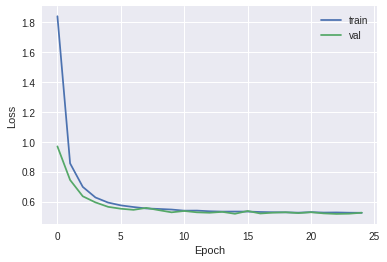

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

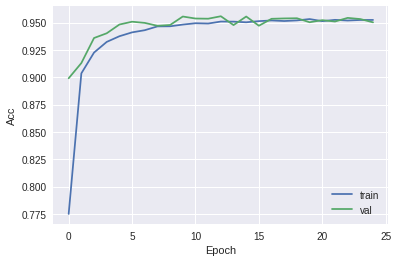

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [0]:
pred=model.predict(xtest[0].reshape(1,28,28,1))
print(pred)
print(pred.argmax())

[[5.33e-04 1.46e-04 1.73e-03 1.33e-03 1.26e-04 1.69e-04 1.47e-07 9.94e-01
  1.30e-04 2.16e-03]]
7


In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.96      0.98      0.97       980
     class 1       0.97      0.99      0.98      1135
     class 2       0.97      0.94      0.96      1032
     class 3       0.98      0.91      0.94      1010
     class 4       0.95      0.95      0.95       982
     class 5       0.88      0.98      0.93       892
     class 6       0.95      0.97      0.96       958
     class 7       0.97      0.94      0.96      1028
     class 8       0.95      0.93      0.94       974
     class 9       0.94      0.93      0.93      1009

   micro avg       0.95      0.95      0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 959    1    0    0    1    8    6    1    4    0]
 [   0 1125    3    2    0    0    4    0    1    0]
 [  13    3  971    6   10    1    8    9   10    1]
 [   1    2    9  921    0   54    0    7   13    3]
 [   1    2    1    0  929    0   13    1    2   33]
 [   2    0    0    2    0  878    5    1    2    2]
 [   7    4    0    0    6    9  930    0    2    0]
 [   1   14   15    3    5    2    0  965    3   20]
 [   7    5    2    2    4   23   14    4  910    3]
 [   7    9    0    4   19   20    0    4    6  940]]


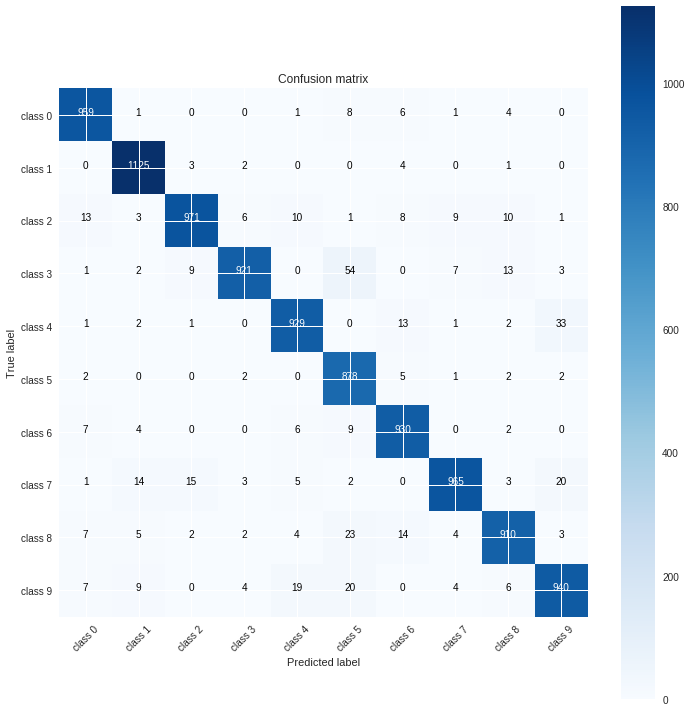

In [0]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.show()

In [0]:
for layer in model.layers:
  print(layer)

In [0]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(xtrain[10].reshape(1,28,28,1))

In [0]:
def display_activation(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='hot')
            activation_index +=1

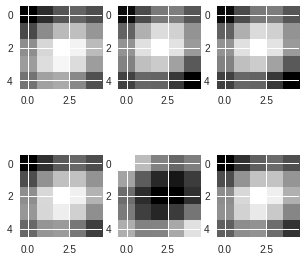

In [0]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 3
row_size = 2
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
print(weight_conv2d_1[:,:,0])
print("")
print(weight_conv2d_1[:,:,1])
print("")
print(weight_conv2d_1[:,:,2])
print("")
print(weight_conv2d_1[:,:,3])
print("")
print(weight_conv2d_1[:,:,4])

[[-0.06  0.01  0.08  0.1   0.06]
 [ 0.06  0.16  0.24  0.25  0.18]
 [ 0.17  0.29  0.36  0.34  0.24]
 [ 0.19  0.3   0.34  0.3   0.19]
 [ 0.12  0.2   0.22  0.16  0.07]]

[[ 0.01  0.11  0.18  0.19  0.13]
 [ 0.15  0.27  0.34  0.32  0.23]
 [ 0.23  0.35  0.4   0.35  0.23]
 [ 0.2   0.29  0.31  0.25  0.13]
 [ 0.09  0.15  0.15  0.08 -0.01]]

[[ 0.    0.09  0.16  0.16  0.11]
 [ 0.12  0.23  0.29  0.28  0.19]
 [ 0.19  0.3   0.34  0.3   0.2 ]
 [ 0.17  0.25  0.27  0.21  0.11]
 [ 0.08  0.13  0.13  0.07 -0.01]]

[[-0.06  0.04  0.13  0.15  0.1 ]
 [ 0.1   0.24  0.33  0.34  0.24]
 [ 0.23  0.38  0.46  0.43  0.31]
 [ 0.25  0.38  0.43  0.37  0.23]
 [ 0.15  0.25  0.26  0.18  0.07]]

[[-0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0.]]


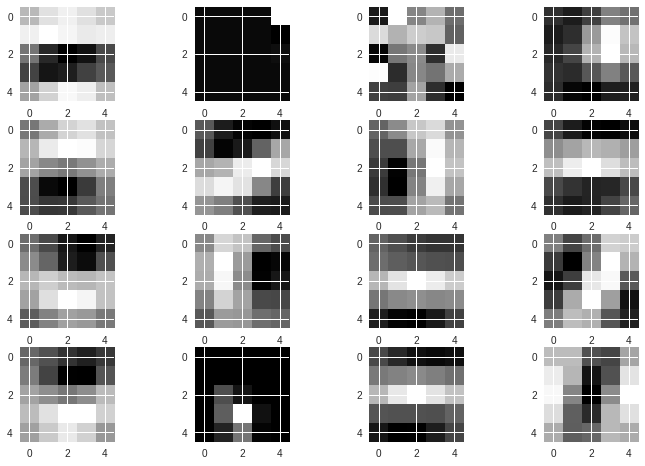

In [0]:
weight_conv2d_2 = model.layers[2].get_weights()[0][:,:,0,:]
 
col_size = 4
row_size = 4
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_2[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
print(weight_conv2d_2[:,:,0])
print("")
print(weight_conv2d_2[:,:,1])
print("")
print(weight_conv2d_2[:,:,2])
print("")
print(weight_conv2d_2[:,:,3])
print("")
print(weight_conv2d_2[:,:,4])
print("")
print(weight_conv2d_2[:,:,5])
print("")
print(weight_conv2d_2[:,:,6])
print("")
print(weight_conv2d_2[:,:,7])
print("")
print(weight_conv2d_2[:,:,8])
print("")
print(weight_conv2d_2[:,:,9])
print("")
print(weight_conv2d_2[:,:,10])
print("")
print(weight_conv2d_2[:,:,11])
print("")
print(weight_conv2d_2[:,:,12])
print("")
print(weight_conv2d_2[:,:,13])
print("")
print(weight_conv2d_2[:,:,14])
print("")
print(weight_conv2d_2[:,:,15])

[[ 0.03  0.05  0.06  0.05  0.04]
 [ 0.06  0.07  0.07  0.06  0.06]
 [-0.02 -0.07 -0.1  -0.08 -0.05]
 [-0.05 -0.08 -0.08 -0.05 -0.04]
 [ 0.01  0.04  0.07  0.06  0.03]]

[[ 5.63e-34  9.15e-35  1.29e-34  7.70e-30  1.44e-25]
 [ 7.25e-35  2.68e-34  7.53e-35 -2.98e-32 -5.72e-27]
 [-1.65e-34 -4.06e-34 -2.37e-34 -2.85e-31  2.84e-27]
 [ 3.50e-34  2.27e-34 -8.63e-35 -4.52e-32 -4.83e-29]
 [-3.26e-34  3.63e-34 -2.90e-35  3.51e-34  2.09e-32]]

[[-3.75e-34  4.16e-34 -7.63e-36  1.56e-34 -8.82e-35]
 [ 2.91e-34  1.50e-34  2.43e-34  2.22e-34 -1.28e-34]
 [-4.44e-34 -5.54e-35  1.35e-35 -3.06e-34  3.41e-34]
 [ 4.05e-34 -3.10e-34  1.08e-36 -6.99e-35  1.25e-34]
 [-2.42e-34 -2.51e-34  1.02e-34 -3.05e-34 -4.66e-34]]

[[ 0.   -0.01  0.01  0.05  0.04]
 [-0.01  0.    0.06  0.11  0.08]
 [-0.    0.01  0.07  0.12  0.08]
 [ 0.   -0.    0.02  0.05  0.02]
 [ 0.   -0.02 -0.02 -0.01 -0.01]]

[[-0.    0.05  0.08  0.09  0.07]
 [ 0.06  0.1   0.12  0.12  0.08]
 [ 0.04  0.01 -0.    0.02  0.05]
 [-0.04 -0.1  -0.11 -0.06  0.01]
